# <font color='black'>Challenge: Measurement</font> 
In this challenge, you will experiment with different ways to measure
quantum systems. 

The first two excercises will guide you through the two methods to measure quantum systems using PyQuil. 

The final two challenges will test your knowledge about quantum measurements.


Import the things we will need:

In [ ]:
from pyquil import Program
from pyquil.gates import *

import sys
sys.path.insert(0, 'tests/')

from test_challenge_measurement import *


Measurement in PyQuil can be done in two different ways:
    
(1) Explicit measure instructions can be added **AT THE END** of a Quil Program

(2) The run_and_measure option can be run to measure **ALL** qubits in the device at once

In this challenge we will look at a device (either a quantum chip or a simulator) for the first time.

Firstly we must choose what device we want to look at. 

For now, we will use a 3 qubit, fully connected device structure called *3q-qvm*.
This chip type is **only** available as a simulator, current quantum devices do not
have this all-to-all connectivity available.

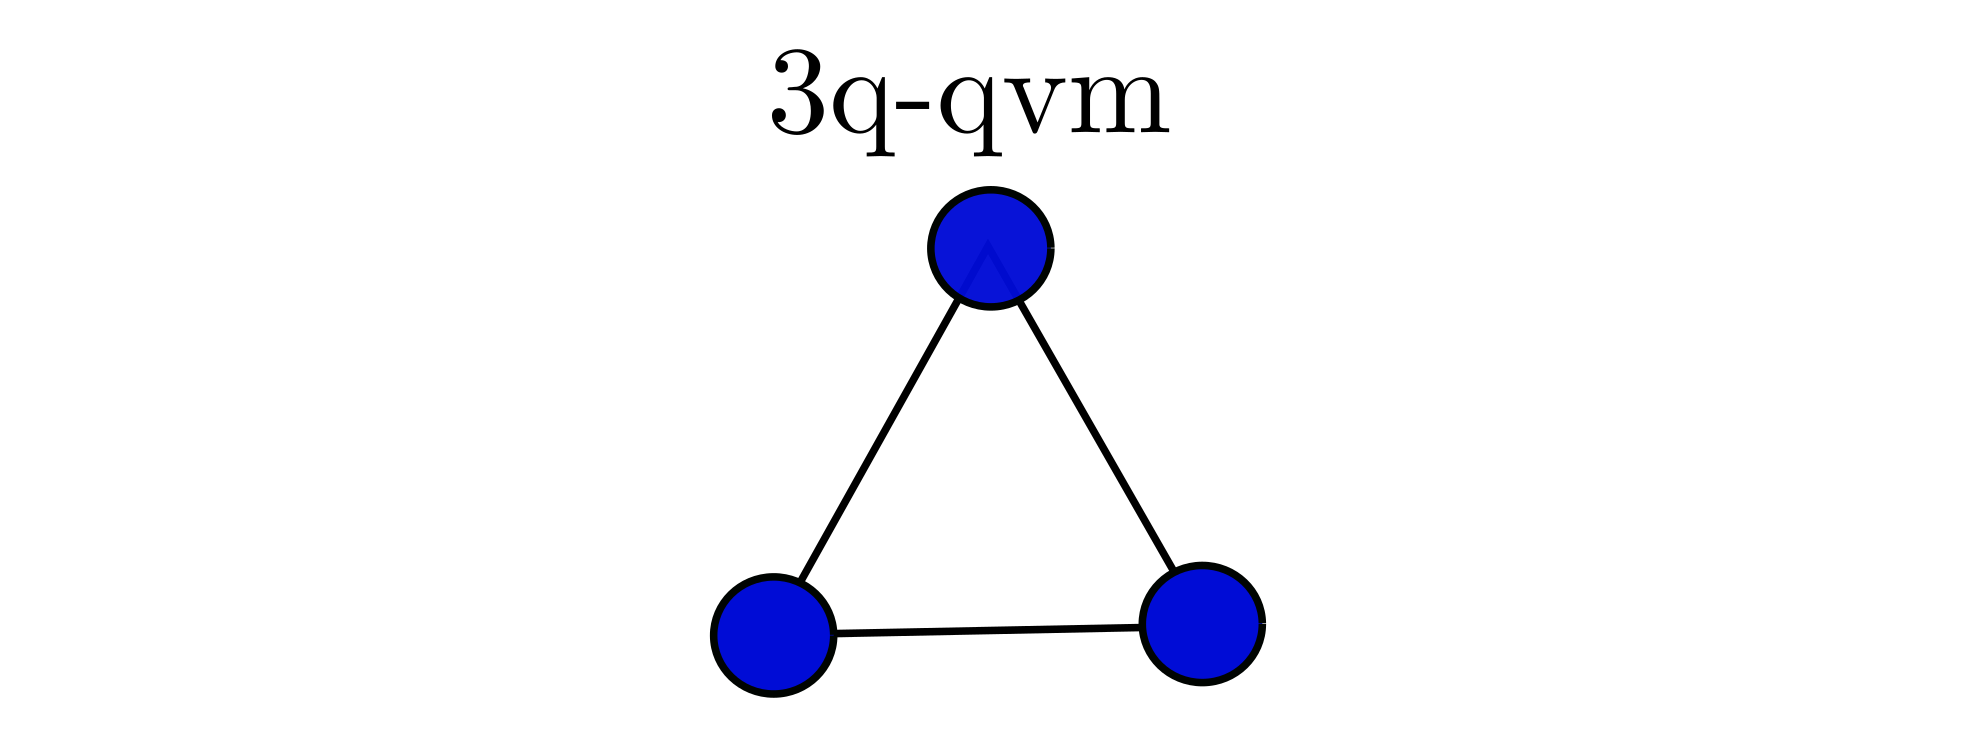

In [ ]:
qc_name = '3q-qvm' # The device name is passed as a string

In [ ]:
# Now import the required function to call a device:

from pyquil.api import get_qc

In [ ]:
qc = get_qc(qc_name) 
# This also takes an argument to specify whether or not we call the simulator, or the real chip
# which we will see later.

# We can also get a list of qubits available on the chip.
qubits = qc.qubits()

# It is a good idea to deal with this list directly
# rather than arbitrary qubit indices (which may not be available on the chosen chip.)
# e.g. implement gates as H(qubits[0]) rather than H(0), as qubit '0' might not be available on the 
# chosen chip

# <font color='Blue'>Task 1:</font> 

## You better run, better [run](https://www.youtube.com/watch?v=SDTZ7iX4vTQ)

First, we will explicitly define the measure instuctions as part
of the quil Program, and call the **run** function 

## Example

In [ ]:
# For explicit measure instructions, we must declare classical memory first to
# put the measurement results into

In [ ]:
circuit = Program()

# We are measuring 2 qubits, so we declare a register called ro which will contain binary (BIT) values
creg = circuit.declare("ro", "BIT", 2)


In [ ]:
# Add gates and measurement instructions here

circuit += MEASURE(qubits[0], creg[0])
circuit += MEASURE(qubits[0], creg[1])

In [ ]:
with local_qvm(): # call the qvm in the background
    num_shots = # Add required number of repetitions of the measurements
    circuit.wrap_in_numshots_loop(num_shots) # This will wrap the circuit in a loop to measure num_shots times 
    # This compiles the circuit onto Quil code and the native architecture of the device; 'qc'
    executable = qc.compile(circuit)
    # 'run' commands take Quil executables and runs them. results will be an array of the measurement results
    # from qubits 0 and 1
    result = qc.run(executable) 


# <font color='blue'>Task 2:</font> 

Using the device ***'5q-qvm'***, prepare the device qubits in the state:

$\left|0\right>\otimes\left|0\right>\otimes\left|+\right>\otimes\left|+\right>\otimes\left|0\right>$

And gather measurement results from **only** those qubit prepared in an equal superposition state.

*Don't forget to declare your registers!*

In [ ]:
qc_name = '5q-qvm' 
circuit = Program()
num_shots = #

results = # 


In [ ]:
test_measurement_run_results(results, num_shots) # Test your code here

# <font color='blue'>Task 3:</font> 

Next, we will use the *run_and_measure* function to measure all qubits
at once, without explicitly using MEASURE instructions.

We can also try out some of the more restricted chip architectures.

We will use the device 'Aspen-4-4Q-A', which has the following qubits connected in a 'line topology':

7 -- 0 -- 1 -- 2

This corresponds to using the qubits, {0, 1, 2, 7} from the 16 Qubit Aspen chip.

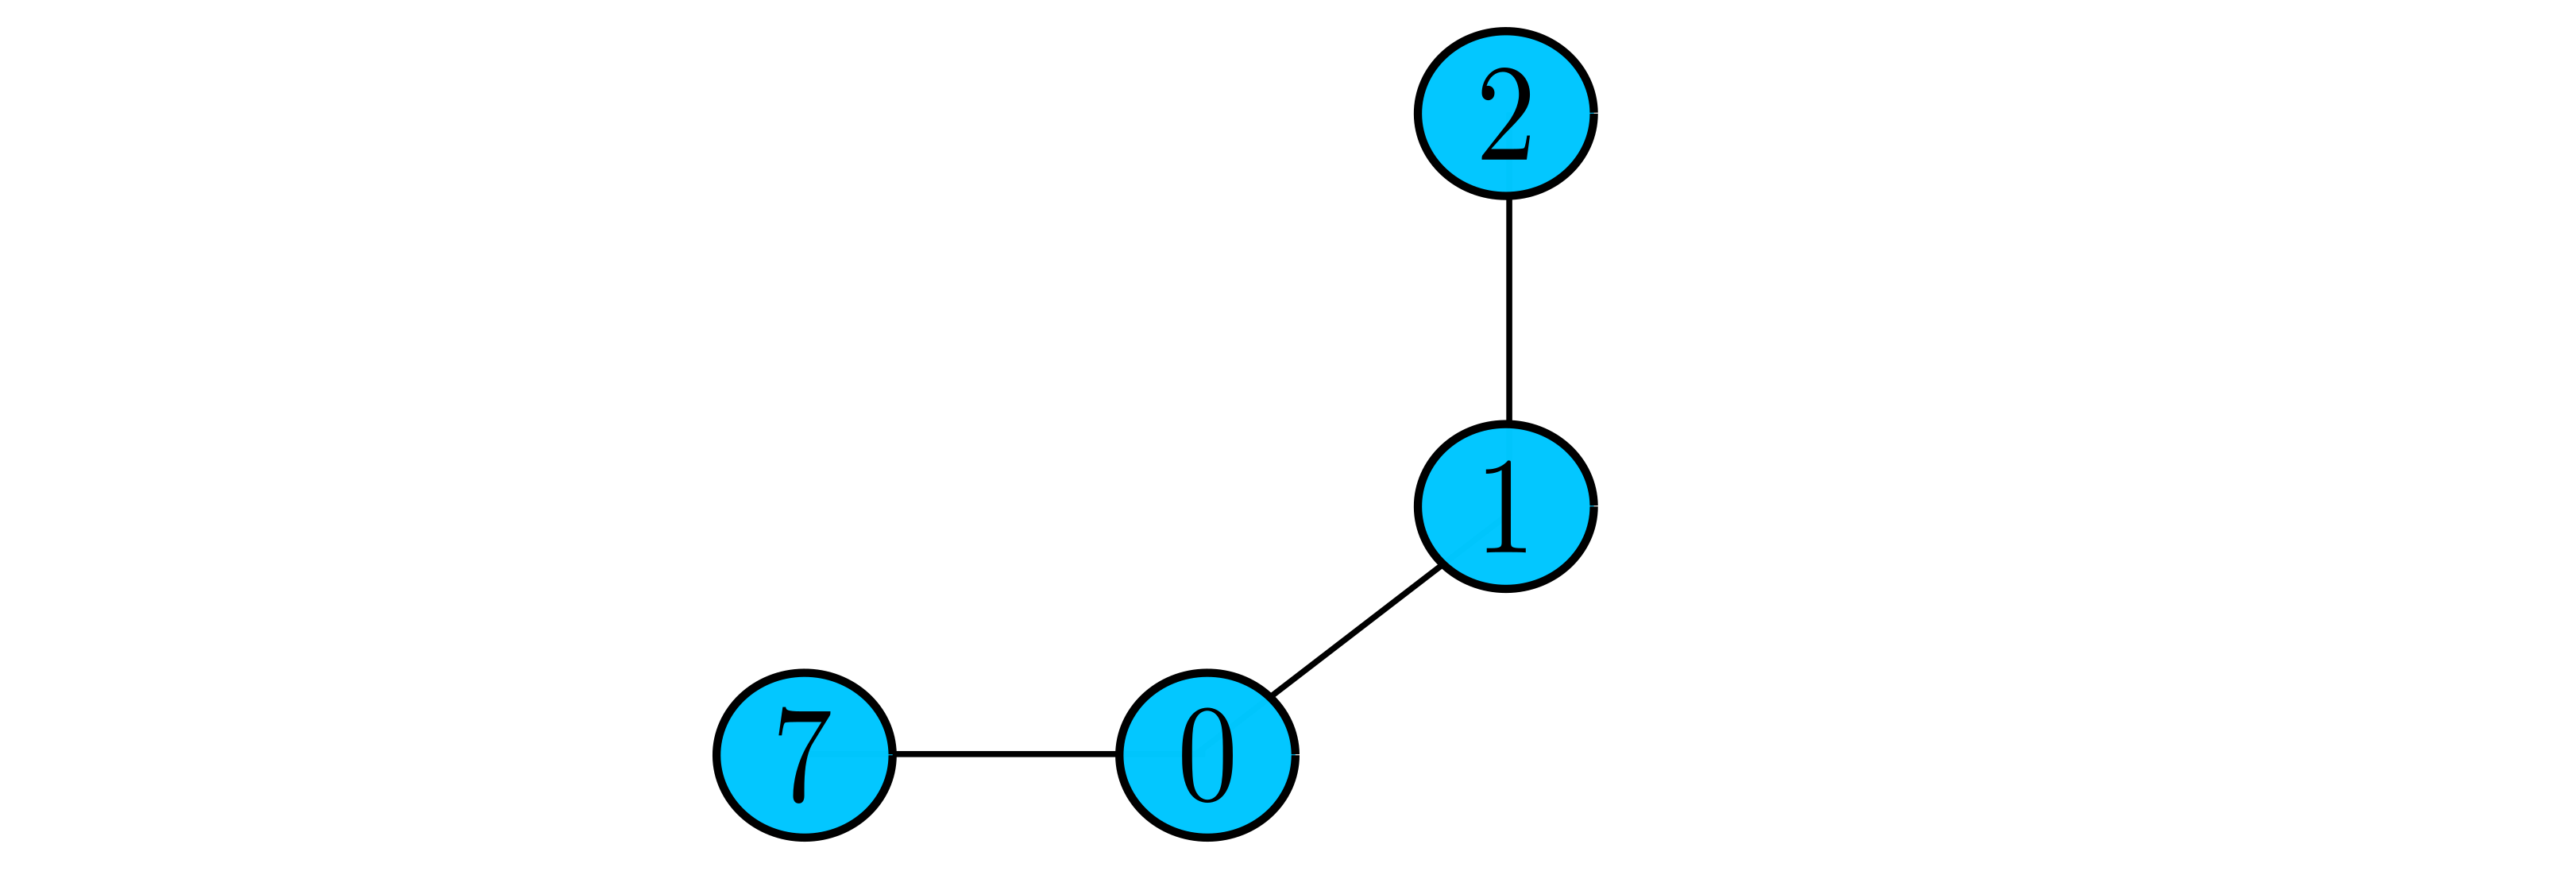

# <font color='blue'>Task 4:</font> 
Measure **all** qubits of the *Aspen-4-4Q-A* chip, and ensure that the 
measurement outcomes from qubits 0 and 7 are **always** 1. 

The measurement outcomes from the other qubits can be anything.

Note: The labels of qubits on the chip *Aspen-4-4Q-A* may not correspond 
to an ordered list starting at index 0

In [ ]:
qc_name = 'Aspen-4-4Q-A' 

# When using get_qc() with a real chip (which is not explicitly a QVM), we must pass an extra
# flag to specify whether we want to run the program on the real QPU (i.e. the real chip), or 
# a simulator of that chip with the same topology, by setting as_qvm to be True 

as_qvm_value = True 
qc = get_qc(qc_name, as_qvm=as_qvm_value) # We have specified a simulator of the Aspen-4-4Q-A chip

qubits = qc.qubits()
circuit = Program()
num_shots = 10

circuit += X(qubits[1])
circuit += X(qubits[2])

results = qc.run_and_measure(circuit, num_shots)
results

In [ ]:
test_measurement_runandmeasure_results(results, num_shots) # Test your code here

# <font color='red'>Measurement Challenge 1:</font> 

## <font color='blue'>Single Qubit Measurement:</font> 
Now, using any chip architecture, produce measurement outcomes 
from the lowest index qubit such that the following statistics are observed:

The state of the chip must be a *pure* state. You can use either 
measurement method.

(1): Outcome 0 is observed $\frac{1}{4}$ of the time. (This corresponds to the qubit state being $\left|0\right>$ with probability $\frac{1}{4}$).

(2): Outcome 1 is observed $\frac{3}{4}$ of the time. (This corresponds to the qubit state being $\left|1\right>$ with probability $\frac{3}{4}$)

*Hint: You can use the WavefunctionSimulator to print out the wavefunction*

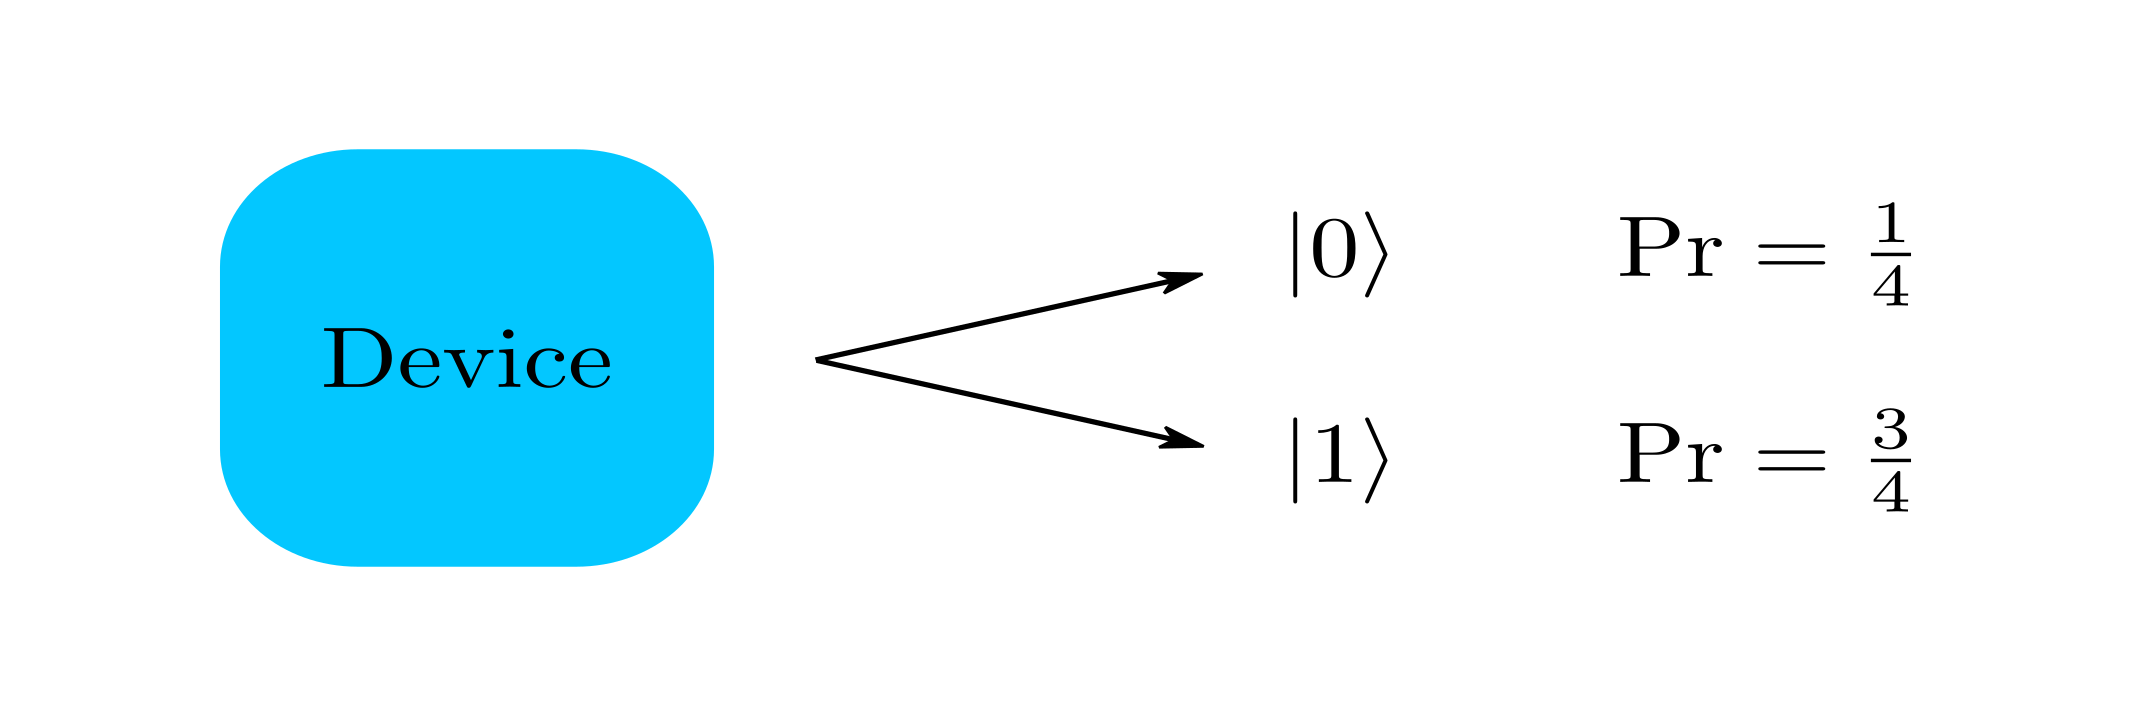

In [ ]:
qc_name = # Add device here

qubits = qc.qubits()
circuit = Program()

num_shots = # Add number of measurement shots

circuit += # 

results = #


## Task

Next extract the required measurement results for the single non-trivial qubit measurement
and pass them as a python list to check the statistics of the measurement outcomes.

*This is a purely python-related challenge*

In [ ]:
results_list =  # Single qubit measurement result list
num_shots = #


test_measurement_challenge(results_list, num_shots) # Check statistics here

# <font color='red'>Measurement Challenge 2:</font> 

## <font color='blue'> Bell Measurements + Non-Local Correlations</font> 
Here you will see the ['spooky action at a distance'](https://en.wikipedia.org/wiki/Quantum_nonlocality) inherent in Quantum Mechanics.

## Task
You will create a Bell State:

(1) \begin{align}\left|\phi^+\right> = \frac{1}{2}\left(\left|00\right> + \left|11\right>\right)\end{align}

that you saw in the unitaries challenge, between two qubits, and measure them
both in the computational basis.

First create the state (1):

In [ ]:
circuit = Program()


Now measure in the computational basis and examine the results. What do you notice??

In [ ]:
num_shots = #
results = #

Now imagine two people, Alice and Bob each took one of these two qubits in the quantum register *before* the measurement
and brought each qubit to opposite sides of the universe. What would you expect for Alice to observe about her measurement results if she measured *her* qubit in the following two scenarios:

(a) **Before** Bob measured his qubit?

(b) **After** Bob measured his qubit?

You should just have observed that the outcomes of Alice and Bob are always the same in each measurement run (each time Alice gets a *0*, Bob also gets a *0* and the same for the *1* outcome.

However, we have just measured in the computational basis, and these correlations between Alice and Bob *could* have been produced classically.

To see the non-locality of Quantum Mechanics, this is not sufficient however. 

## Task
Instead of measuring both qubits in the computational basis, measure both qubits (prepared again in the same Bell state as above) in the Hadamard basis ($|\pm\rangle$). 
 
 *Hint: You will need to apply gates to the state before the measurement as before.*

In [ ]:
circuit = Program()  # Prepare Bell state again


In [ ]:
# Measure both qubits as before but don't forget to rotate each qubit into the correct basis!
num_shots = # 
results = #

What did you notice that time?